# Import packages

In [1]:
#import packages
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, roc_auc_score,precision_recall_curve
from sklearn.model_selection import StratifiedKFold, ShuffleSplit
from itertools import cycle
from sklearn.preprocessing import label_binarize,LabelEncoder, MinMaxScaler
from scipy import interp
import matplotlib.patches as patches
import csv
from numpy import array, argmax
from sklearn.metrics import mean_absolute_error, mean_squared_log_error,log_loss, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, learning_curve, validation_curve
from sklearn.svm import SVC
import yellowbrick as yb
from yellowbrick.features import Rank1D, PCADecomposition
from yellowbrick.regressor import ResidualsPlot
from sklearn.feature_selection import RFECV
import seaborn as sns
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.patches as mpatches
from yellowbrick.target import FeatureCorrelation
from yellowbrick.model_selection import LearningCurve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import hamming_loss
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.neighbors import KNeighborsClassifier
import pickle
import sys

# Import dataset

In [2]:
df_updated = pd.read_csv('/home/lddev002/Jupyter_notebooks_innovusion/innovusion_features_updated/final_feature/innovusion_features_all_new.txt',delimiter="\t",error_bad_lines=False,header=None,
                  names=['class','height','width','box_volume','l1','l2','l3','eigen_curvature','eigen_entropy','omnivariance','anisotropy','sum_eigen'])

In [3]:
#Integer Encoding
# integer encode class labels
le = preprocessing.LabelEncoder()
le.fit(df_updated['class'])
print(list(le.classes_))
integer_encoded = le.transform(df_updated['class']) 

#integer_encoded = label_encoder.fit_transform(df_shuffled['class'])

df_shuffled_part1 = df_updated[['height','width','box_volume','l1','l2','l3','eigen_curvature','eigen_entropy','omnivariance','anisotropy','sum_eigen']]

integer_encoded_class = pd.DataFrame(integer_encoded)


#final shuffled dataframe with  integer encoded class labels
df_encoded = integer_encoded_class.join(df_shuffled_part1)

df_encoded.columns.values[0] = 'class'


['Car', 'Cyclist', 'Misc', 'Motorbike', 'Pedestrian']


# Shuffle dataset

In [4]:
#shuffle df_balanced
df_encoded = df_encoded.reindex(np.random.permutation(df_encoded.index))
df_encoded.index = range(df_encoded.shape[0])

# Remove duplicates and Reindex rows

In [5]:
df_encoded = df_encoded.drop_duplicates()
df_encoded.index = range(df_encoded.shape[0])

In [ ]:
df_encoded[['class']]

# Count Total class samples

In [25]:
# Total samples
# filter different class samples

df_car_filter = df_encoded['class']==0
df_pedestrian_filter = df_encoded['class']==4
df_cyclist_filter = df_encoded['class']==1
df_misc_filter = df_encoded['class']==2
df_motorbike_filter = df_encoded['class']==3


# create sub dataframe for each filtered class

df_car = df_encoded[df_car_filter]
df_pedestrian = df_encoded[df_pedestrian_filter]
df_cyclist = df_encoded[df_cyclist_filter]
df_motorbike = df_encoded[df_motorbike_filter]
df_misc = df_encoded[df_misc_filter]

print("Before Outlier removal")
print("----------------------------")
print("Total : {} | Car : {} | Pedestrian : {} | Cyclist : {} | Motorbike : {} ".format(df_encoded.shape[0] - df_misc.shape[0], df_car.shape[0],df_pedestrian.shape[0],df_cyclist.shape[0],df_motorbike.shape[0]))

Before Outlier removal
----------------------------
Total : 1387 | Car : 825 | Pedestrian : 184 | Cyclist : 182 | Motorbike : 196 


# Outlier removal from data distribution (Class wise each feature)

## Outlier Removal - Class - Car

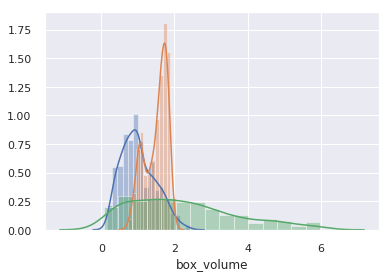

In [26]:
df_car_h = df_car[(df_car['height'] >=0) & (df_car['height'] <= 2.5)]
df_car_w = df_car[(df_car['width'] >=0.7) & (df_car['width'] <= 2.0)]
df_car_v = df_car[(df_car['box_volume'] >=0.0) & (df_car['box_volume'] <= 6.0)]
df_car_l1 = df_car[(df_car['l1'] >=0.5) & (df_car['l1'] <= 40.0)]
df_car_l2 = df_car[(df_car['l2'] >=0.5) & (df_car['l2'] <= 20.0)]
df_car_l3 = df_car[(df_car['l3'] >=0.5) & (df_car['l3'] <= 14.0)]
df_car_eigen_curve = df_car[(df_car['eigen_curvature'] >=0.02) & (df_car['eigen_curvature'] <= 0.15)]
df_car_eigen_entropy = df_car[(df_car['eigen_entropy'] >=0.6) & (df_car['eigen_entropy'] <= 1.0)]
df_car_omnivariance = df_car[(df_car['omnivariance'] >=0.15) & (df_car['omnivariance'] <= 0.30)]
df_car_anisotropy = df_car[(df_car['anisotropy'] >=0.75) & (df_car['anisotropy'] <= 1.0)]
df_car_sum_eigen = df_car[(df_car['sum_eigen'] >=0.0) & (df_car['sum_eigen'] <= 70.0)]
sns.set(style="darkgrid")
sns.distplot(df_car_h['height'])
sns.distplot(df_car_w['width'])
sns.distplot(df_car_v['box_volume'])


In [27]:

df_car_without_noise = pd.concat([df_car_h['height'], df_car_w['width'],df_car_v['box_volume'],
                             df_car_l1['l1'],df_car_l2['l2'],df_car_l3['l3'],
                             df_car_eigen_curve['eigen_curvature'],
                             df_car_eigen_entropy['eigen_entropy'],
                             df_car_omnivariance['omnivariance'],
                             df_car_anisotropy['anisotropy'],
                             df_car_sum_eigen['sum_eigen']],1)
df_car_without_noise.dropna(inplace= True)
df_car_without_noise.insert(0, "class", 0, True) 



## Outlier Removal - Class - Cyclist

In [28]:
df_cyclist_h = df_cyclist[(df_cyclist['height'] >=0.5) & (df_cyclist['height'] <= 2.2)]
df_cyclist_w = df_cyclist[(df_cyclist['width'] >=0.45) & (df_cyclist['width'] <= 0.8)]
df_cyclist_v = df_cyclist[(df_cyclist['box_volume'] >=0.2) & (df_cyclist['box_volume'] <= 3.0)]
df_cyclist_l1 = df_cyclist[(df_cyclist['l1'] >=0.5) & (df_cyclist['l1'] <= 100.0)]
df_cyclist_l2 = df_cyclist[(df_cyclist['l2'] >=0.5) & (df_cyclist['l2'] <= 50.0)]
df_cyclist_l3 = df_cyclist[(df_cyclist['l3'] >=0.5) & (df_cyclist['l3'] <= 35.0)]
df_cyclist_eigen_curve = df_cyclist[(df_cyclist['eigen_curvature'] >=0.01) & (df_cyclist['eigen_curvature'] <= 0.09)]
df_cyclist_eigen_entropy = df_cyclist[(df_cyclist['eigen_entropy'] >=0.5) & (df_cyclist['eigen_entropy'] <= 0.9)]
df_cyclist_omnivariance = df_cyclist[(df_cyclist['omnivariance'] >=0.150) & (df_cyclist['omnivariance'] <= 0.235)]
df_cyclist_anisotropy = df_cyclist[(df_cyclist['anisotropy'] >=0.85) & (df_cyclist['anisotropy'] <= 1.0)]
df_cyclist_sum_eigen = df_cyclist[(df_cyclist['sum_eigen'] >=0.0) & (df_cyclist['sum_eigen'] <= 130.0)]



In [29]:

df_cyclist_without_noise = pd.concat([df_cyclist_h['height'], df_cyclist_w['width'],df_cyclist_v['box_volume'],
                             df_cyclist_l1['l1'],df_cyclist_l2['l2'],df_cyclist_l3['l3'],
                             df_cyclist_eigen_curve['eigen_curvature'],
                             df_cyclist_eigen_entropy['eigen_entropy'],
                             df_cyclist_omnivariance['omnivariance'],
                             df_cyclist_anisotropy['anisotropy'],
                             df_cyclist_sum_eigen['sum_eigen']],1)
df_cyclist_without_noise.dropna(inplace= True)
df_cyclist_without_noise.insert(0, "class", 1, True) 


## Outlier Removal - Class - Motorbike

In [30]:
df_motorbike_h = df_motorbike[(df_motorbike['height'] >=1.2) & (df_motorbike['height'] <= 2.0)]
df_motorbike_w = df_motorbike[(df_motorbike['width'] >=0.65) & (df_motorbike['width'] <= 0.9)]
df_motorbike_v = df_motorbike[(df_motorbike['box_volume'] >=1.1) & (df_motorbike['box_volume'] <= 2.3)]
df_motorbike_l1 = df_motorbike[(df_motorbike['l1'] >=12) & (df_motorbike['l1'] <= 35.0)]
df_motorbike_l2 = df_motorbike[(df_motorbike['l2'] >=4) & (df_motorbike['l2'] <= 15.0)]
df_motorbike_l3 = df_motorbike[(df_motorbike['l3'] >=0.2) & (df_motorbike['l3'] <= 15.0)]
df_motorbike_eigen_curve = df_motorbike[(df_motorbike['eigen_curvature'] >=0.075) & (df_motorbike['eigen_curvature'] <= 0.150)]
df_motorbike_eigen_entropy = df_motorbike[(df_motorbike['eigen_entropy'] >=0.85) & (df_motorbike['eigen_entropy'] <= 0.97)]
df_motorbike_omnivariance = df_motorbike[(df_motorbike['omnivariance'] >=0.25) & (df_motorbike['omnivariance'] <= 0.30)]
df_motorbike_anisotropy = df_motorbike[(df_motorbike['anisotropy'] >=0.75) & (df_motorbike['anisotropy'] <= 0.87)]
df_motorbike_sum_eigen = df_motorbike[(df_motorbike['sum_eigen'] >=20) & (df_motorbike['sum_eigen'] <= 65.0)]

In [31]:
df_motorbike_without_noise = pd.concat([df_motorbike_h['height'], df_motorbike_w['width'],df_motorbike_v['box_volume'],
                             df_motorbike_l1['l1'],df_motorbike_l2['l2'],df_motorbike_l3['l3'],
                             df_motorbike_eigen_curve['eigen_curvature'],
                             df_motorbike_eigen_entropy['eigen_entropy'],
                             df_motorbike_omnivariance['omnivariance'],
                             df_motorbike_anisotropy['anisotropy'],
                             df_motorbike_sum_eigen['sum_eigen']],1)
df_motorbike_without_noise.dropna(inplace= True)
df_motorbike_without_noise.insert(0, "class", 3, True) 

## Outlier Removal - Class - Pedestrian

In [32]:
df_pedestrian_h = df_pedestrian[(df_pedestrian['height'] >=0.4) & (df_pedestrian['height'] <= 2.0)]
df_pedestrian_w = df_pedestrian[(df_pedestrian['width'] >=0.2) & (df_pedestrian['width'] <= 1.25)]
df_pedestrian_v = df_pedestrian[(df_pedestrian['box_volume'] >=0.0) & (df_pedestrian['box_volume'] <= 3.0)]
df_pedestrian_l1 = df_pedestrian[(df_pedestrian['l1'] >=0) & (df_pedestrian['l1'] <= 50.0)]
df_pedestrian_l2 = df_pedestrian[(df_pedestrian['l2'] >=0) & (df_pedestrian['l2'] <= 40.0)]
df_pedestrian_l3 = df_pedestrian[(df_pedestrian['l3'] >=0) & (df_pedestrian['l3'] <= 25.0)]
df_pedestrian_eigen_curve = df_pedestrian[(df_pedestrian['eigen_curvature'] >=0.000) & (df_pedestrian['eigen_curvature'] <= 0.100)]
df_pedestrian_eigen_entropy = df_pedestrian[(df_pedestrian['eigen_entropy'] >=0.2) & (df_pedestrian['eigen_entropy'] <=1.00)]
df_pedestrian_omnivariance = df_pedestrian[(df_pedestrian['omnivariance'] >=0.05) & (df_pedestrian['omnivariance'] <= 0.30)]
df_pedestrian_anisotropy = df_pedestrian[(df_pedestrian['anisotropy'] >=0.85) & (df_pedestrian['anisotropy'] <= 1.00)]
df_pedestrian_sum_eigen = df_pedestrian[(df_pedestrian['sum_eigen'] >=4) & (df_pedestrian['sum_eigen'] <= 80.0)]

In [33]:
df_pedestrian_without_noise = pd.concat([df_pedestrian_h['height'], df_pedestrian_w['width'],df_pedestrian_v['box_volume'],
                             df_pedestrian_l1['l1'],df_pedestrian_l2['l2'],df_pedestrian_l3['l3'],
                             df_pedestrian_eigen_curve['eigen_curvature'],
                             df_pedestrian_eigen_entropy['eigen_entropy'],
                             df_pedestrian_omnivariance['omnivariance'],
                             df_pedestrian_anisotropy['anisotropy'],
                             df_pedestrian_sum_eigen['sum_eigen']],1)
df_pedestrian_without_noise.dropna(inplace= True)
df_pedestrian_without_noise.insert(0, "class", 4, True) 

## Join each Class wise features

In [34]:
result1 = df_car_without_noise.append(df_cyclist_without_noise)

In [35]:
result2 = result1.append(df_motorbike_without_noise)

In [36]:
result3 = result2.append(df_pedestrian_without_noise) 

In [37]:

print("After Outlier removal")
print("----------------------------")


print("Total : {} | Car : {} | Pedestrian : {} | Cyclist : {} | Motorbike : {} ".format(result3.shape[0], df_car_without_noise.shape[0],df_pedestrian_without_noise.shape[0],df_cyclist_without_noise.shape[0],df_motorbike_without_noise.shape[0]))

After Outlier removal
----------------------------
Total : 764 | Car : 448 | Pedestrian : 134 | Cyclist : 74 | Motorbike : 108 


In [ ]:
## Before outlier removal (without misc)

In [9]:
df_encoded_condition = df_encoded['class'] != 2
df_encoded_no_misc = df_encoded[df_encoded_condition]
df_encoded_no_misc.index = range(df_encoded_no_misc.shape[0])


In [38]:
# Total samples
# filter different class samples

car_filter = result3['class']==0
pedestrian_filter = result3['class']==4
cyclist_filter = result3['class']==1
motorbike_filter = result3['class']==3


# create sub dataframe for each filtered class

car = result3[car_filter]
pedestrian = result3[pedestrian_filter]
cyclist = result3[cyclist_filter]
motorbike = result3[motorbike_filter]


car.index = range(car.shape[0])
pedestrian.index = range(pedestrian.shape[0])
cyclist.index = range(cyclist.shape[0])
motorbike.index = range(motorbike.shape[0])



#take equal samples


#car - 180 samples
rows1 = np.random.choice(car.index.values, 74)
df_car_74 = car.loc[rows1]


#pedestrian - 180 samples
rows2 = np.random.choice(pedestrian.index.values,74)
df_pedestrian_74 = pedestrian.loc[rows2]


#cyclist - 180 samples
rows3 = np.random.choice(cyclist.index.values,74)
df_cyclist_74 = cyclist.loc[rows3]


#motorbike - 180 samples
rows4 = np.random.choice(motorbike.index.values,74)
df_motorbike_74 = motorbike.loc[rows4]



result3_new = pd.concat([df_car_74,df_cyclist_74,df_motorbike_74,df_pedestrian_74],axis = 0)
#shuffle df_balanced
result3_new.index = range(result3_new.shape[0])

#shuffle df_balanced
result3_new = result3_new.reindex(np.random.permutation(result3_new.index))
result3_new.index = range(result3_new.shape[0])

result3_new.shape

(296, 12)

## Visualize Features per each Class

In [ ]:
from matplotlib import pyplot
#catplot
sns.set(style="darkgrid")

sns.catplot(x="class", y="height", data=result3)

sns.catplot(x="class", y="width", data=result3)

sns.catplot(x="class", y="box_volume", data=result3)

sns.catplot(x="class", y="l1", data=result3)

sns.catplot(x="class", y="l2", data=result3)

sns.catplot(x="class", y="l3", data=result3)

sns.catplot(x="class", y="eigen_curvature", data=result3)
sns.catplot(x="class", y="eigen_entropy", data=result3)
sns.catplot(x="class", y="omnivariance", data=result3)
sns.catplot(x="class", y="anisotropy", data=result3)
sns.catplot(x="class", y="sum_eigen", data=result3)

# With Feature Scaling - Divide X-Features and Y-Class

In [ ]:
simple_features = ['height','width','box_volume']
eigen_features = ['l1','l2','l3','eigen_curvature','eigen_entropy','omnivariance','anisotropy','sum_eigen']
all_features = ['height','width','box_volume','l1','l2','l3','eigen_curvature','eigen_entropy','omnivariance','anisotropy','sum_eigen']


# new normalization
scaler_h = preprocessing.StandardScaler().fit(result3[['height']])
scaler_w = preprocessing.StandardScaler().fit(result3[['width']])
scaler_v = preprocessing.StandardScaler().fit(result3[['box_volume']])
scaler_l1 = preprocessing.StandardScaler().fit(result3[['l1']])
scaler_l2 = preprocessing.StandardScaler().fit(result3[['l2']])
scaler_l3 = preprocessing.StandardScaler().fit(result3[['l3']])
scaler_eigen_curve = preprocessing.StandardScaler().fit(result3[['eigen_curvature']])
scaler_eigen_entropy = preprocessing.StandardScaler().fit(result3[['eigen_entropy']])
scaler_omnivariance = preprocessing.StandardScaler().fit(result3[['omnivariance']])
scaler_anisotropy = preprocessing.StandardScaler().fit(result3[['anisotropy']])
scaler_sum_eigen = preprocessing.StandardScaler().fit(result3[['sum_eigen']])

scaled_df_h = scaler_h.transform(result3[['height']])
scaled_df_w = scaler_w.transform(result3[['width']])
scaled_df_v = scaler_v.transform(result3[['box_volume']])
scaled_df_l1 = scaler_l1.transform(result3[['l1']])
scaled_df_l2 = scaler_l2.transform(result3[['l2']])
scaled_df_l3 = scaler_l3.transform(result3[['l3']])
scaled_df_eigen_curve = scaler_eigen_curve.transform(result3[['eigen_curvature']])
scaled_df_eigen_entropy = scaler_eigen_entropy.transform(result3[['eigen_entropy']])
scaled_df_omnivariance = scaler_omnivariance.transform(result3[['omnivariance']])
scaled_df_anisotropy = scaler_anisotropy.transform(result3[['anisotropy']])
scaled_df_sum_eigen = scaler_sum_eigen.transform(result3[['sum_eigen']])

simple_scaled = [scaled_df_h, scaled_df_w, scaled_df_v]
eigen_scaled = [scaled_df_l1,scaled_df_l2,scaled_df_l3,scaled_df_eigen_curve,scaled_df_eigen_entropy,scaled_df_omnivariance,scaled_df_anisotropy,scaled_df_sum_eigen]
all_scaled = [scaled_df_h, scaled_df_w, scaled_df_v,scaled_df_l1,scaled_df_l2,scaled_df_l3,scaled_df_eigen_curve,scaled_df_eigen_entropy,scaled_df_omnivariance,scaled_df_anisotropy,scaled_df_sum_eigen]


scaled_df = np.column_stack(all_scaled)
scaled_df_new = pd.DataFrame(scaled_df,columns = all_features)


X = np.array(scaled_df_new[all_features])
Y = np.array(result3[['class']])


## Without Feature Scaling - Divide X-Features and Y-Class

In [56]:
simple_features = ['height','width','box_volume']
eigen_features = ['l1','l2','l3','eigen_curvature','eigen_entropy','omnivariance','anisotropy','sum_eigen']
all_features = ['height','width','box_volume','l1','l2','l3','eigen_curvature','eigen_entropy','omnivariance','anisotropy','sum_eigen']




X = np.array(result3_new[all_features])
Y = np.array(result3_new[['class']])

# Best Parameter search - Random Forest (RandomSearchCV)

In [51]:
#BEST PARAMETER SEARCH

rf = RandomForestClassifier()


# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

#pprint(random_grid)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv =KFold(10, shuffle=False,random_state = 42), verbose=3, 
                               random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X, Y)

rf_random.best_params_

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  5.8min finished
/home/lddev002/.local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/lddev002/.local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example us

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 1600}

# Best Parameter search - SVM (GridSearchCV)

In [54]:
#Best Parameter Search

#feature scaling

parameter_candidates = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ]

# Create a classifier object with the classifier and parameter candidates
clf2 = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1,
                    cv=KFold(10, shuffle=False,random_state = 42),verbose = 3)

# Train the classifier on data1's feature and target data
clf2.fit(X, Y)   

# View the accuracy score
print('Best score for our data:', clf2.best_score_) 

# View the best parameters for the model found using grid search
print('Best C:',clf2.best_estimator_.C) 
print('Best Kernel:',clf2.best_estimator_.kernel)
print('Best Gamma:',clf2.best_estimator_.gamma)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.4min finished
/home/lddev002/.local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/lddev002/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


('Best score for our data:', 0.9628378378378378)
('Best C:', 1000)
('Best Kernel:', 'linear')
('Best Gamma:', 'auto_deprecated')


# Best Parameter search - KNN(GridSearchCV)

In [57]:
#BEST PARAMETER SEARCH

#making the instance
model = KNeighborsClassifier()

#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1,cv=KFold(10,random_state = 42, shuffle=False),verbose = 3)

#Learning
model1.fit(X,Y)

#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   53.8s


('Best Hyper Parameters:\n', {'n_neighbors': 9, 'n_jobs': -1, 'weights': 'distance', 'leaf_size': 1, 'algorithm': 'auto'})


[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  1.1min finished
/home/lddev002/.local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/lddev002/.local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


# K Fold  (10 Fold)

In [58]:
kf = KFold(10, shuffle=True,random_state = 42)

accuracy_list = []
classification_error = []
recall = []
precision_score = []
f1_score =[]
mean_abs_error = []
mean_squ_log_error = []


y_true = []
y_score = []
y_pred = []
y_prob = []
train_error = []
test_error = []
x_test_from_fold = []


#clf = RandomForestClassifier().set_params(bootstrap=False,max_depth=50,max_features='auto',min_samples_leaf=1,
#                                      min_samples_split=2,n_estimators=1000)

clf = KNeighborsClassifier().set_params(n_neighbors = 9,n_jobs= -1,
                         weights = 'distance',leaf_size= 1,
                        algorithm = 'auto')

# Random Forest
#clf = rf_random.best_estimator_

# SVM
#clf = svm.SVC(probability=True).set_params(kernel = clf2.best_estimator_.kernel, C= clf2.best_estimator_.C, 
#                 gamma = clf2.best_estimator_.gamma)

#KNN
#clf = KNeighborsClassifier().set_params(n_neighbors = 6,n_jobs= -1,
#                          weights = 'distance',leaf_size= 1,
#                          algorithm = 'auto')


for k, (train, test) in enumerate(kf.split(X, Y)):
        
        clf.fit(X[train],Y[train])
       
        accuracy = clf.score(X[test],Y[test])     
        prediction = clf.predict(X[test])
        probability = clf.predict_proba(X[test]) 
        probability_train = clf.predict_proba(X[train]) 
        accuracy_list.append(accuracy)
        
        #for classification report
        y_true.append(Y[test])
        y_pred.append(clf.predict(X[test]))
        y_prob.append(clf.predict_proba(X[test]))
        x_test_from_fold.append(X[test])
        print("mean error",log_loss(Y[train], probability_train,labels=[0,1,3,4]))
        train_error.append(log_loss(Y[train], probability_train,labels=[0,1,3,4]))
        test_error.append(log_loss(Y[test], probability,labels=[0,1,3,4]))
       
        ###

        
        classification_error.append(1 - metrics.accuracy_score(Y[test], prediction))
        recall.append(metrics.recall_score(Y[test], prediction, average='micro'))
        precision_score.append(metrics.precision_score(Y[test], prediction, average='macro'))
        f1_score.append(metrics.f1_score(Y[test], prediction, average='weighted'))
        mean_abs_error.append(mean_absolute_error(Y[test], prediction))
        mean_squ_log_error.append(mean_squared_log_error(Y[test], prediction))  
        
        print("classifier score : ",clf.score(X[test],Y[test]))
        
        print("For k =  {} | train set size : {} | test set size : {}".format(k,X[train].shape[0],X[test].shape[0]))
        #classification error
        print("------------------ for k : {}---------------------".format(k))
        print("classification error : ",1 - metrics.accuracy_score(Y[test], prediction))
        #evaluation metrices
        print("precision score : ",metrics.precision_score(Y[test], prediction, average='macro'))
        print("Recall : ",metrics.recall_score(Y[test], prediction, average='micro'))
        print("F1 score : ",metrics.f1_score(Y[test], prediction, average='weighted'))
        print("Mean Absolute Error : ",mean_absolute_error(Y[test], prediction))
        print("mean_squared_log_error : ",mean_squared_log_error(Y[test], prediction))
        print("--------------------------------------------------------")
        

print("Overall score")
#print accuracy % as per cross validation scores

print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(accuracy_list),np.std(accuracy_list) * 2))
print("accuracy : ",np.mean(accuracy_list))
print("classification error : ",np.mean(classification_error))
#evaluation metrices
print("precision score : ",np.mean(precision_score))
print("Recall : ",np.mean(recall))
print("F1 score : ",np.mean(f1_score))
print("Train_error Log_loss: ",np.mean(train_error))
print("Test_error Log_loss : ",np.mean(test_error))


/home/lddev002/.local/lib/python2.7/site-packages/ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


('mean error', 3.1637182431047747e-15)
('classifier score : ', 0.8666666666666667)
For k =  0 | train set size : 266 | test set size : 30
------------------ for k : 0---------------------
('classification error : ', 0.1333333333333333)
('precision score : ', 0.8833333333333334)
('Recall : ', 0.8666666666666667)
('F1 score : ', 0.8660884866767219)
('Mean Absolute Error : ', 0.36666666666666664)
('mean_squared_log_error : ', 0.15833069395117952)
--------------------------------------------------------


/home/lddev002/.local/lib/python2.7/site-packages/ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


('mean error', 3.162883488950921e-15)
('classifier score : ', 0.9333333333333333)
For k =  1 | train set size : 266 | test set size : 30
------------------ for k : 1---------------------
('classification error : ', 0.06666666666666665)
('precision score : ', 0.9472222222222222)
('Recall : ', 0.9333333333333333)
('F1 score : ', 0.9285242518059856)
('Mean Absolute Error : ', 0.23333333333333334)
('mean_squared_log_error : ', 0.11432930330995698)
--------------------------------------------------------


/home/lddev002/.local/lib/python2.7/site-packages/ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


('mean error', 3.166222505566335e-15)
('classifier score : ', 0.8333333333333334)
For k =  2 | train set size : 266 | test set size : 30
------------------ for k : 2---------------------
('classification error : ', 0.16666666666666663)
('precision score : ', 0.8125)
('Recall : ', 0.8333333333333334)
('F1 score : ', 0.8301489016659295)
('Mean Absolute Error : ', 0.5666666666666667)
('mean_squared_log_error : ', 0.32879312015415185)
--------------------------------------------------------


/home/lddev002/.local/lib/python2.7/site-packages/ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


('mean error', 3.167892013874042e-15)
('classifier score : ', 0.8666666666666667)
For k =  3 | train set size : 266 | test set size : 30
------------------ for k : 3---------------------
('classification error : ', 0.1333333333333333)
('precision score : ', 0.8500000000000001)
('Recall : ', 0.8666666666666667)
('F1 score : ', 0.8646464646464646)
('Mean Absolute Error : ', 0.43333333333333335)
('mean_squared_log_error : ', 0.24245010702147737)
--------------------------------------------------------


/home/lddev002/.local/lib/python2.7/site-packages/ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


('mean error', 3.1620487347970675e-15)
('classifier score : ', 0.8)
For k =  4 | train set size : 266 | test set size : 30
------------------ for k : 4---------------------
('classification error : ', 0.19999999999999996)
('precision score : ', 0.780952380952381)
('Recall : ', 0.8)
('F1 score : ', 0.80030959752322)
('Mean Absolute Error : ', 0.4)
('mean_squared_log_error : ', 0.13936761897380637)
--------------------------------------------------------


/home/lddev002/.local/lib/python2.7/site-packages/ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


('mean error', 3.165387751412482e-15)
('classifier score : ', 0.8333333333333334)
For k =  5 | train set size : 266 | test set size : 30
------------------ for k : 5---------------------
('classification error : ', 0.16666666666666663)
('precision score : ', 0.875)
('Recall : ', 0.8333333333333334)
('F1 score : ', 0.8490497076023391)
('Mean Absolute Error : ', 0.36666666666666664)
('mean_squared_log_error : ', 0.19550074186682173)
--------------------------------------------------------


/home/lddev002/.local/lib/python2.7/site-packages/ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


('mean error', 3.1630960855144493e-15)
('classifier score : ', 0.7241379310344828)
For k =  6 | train set size : 267 | test set size : 29
------------------ for k : 6---------------------
('classification error : ', 0.27586206896551724)
('precision score : ', 0.7166666666666666)
('Recall : ', 0.7241379310344828)
('F1 score : ', 0.7203431776934499)
('Mean Absolute Error : ', 0.7931034482758621)
('mean_squared_log_error : ', 0.4513356007639949)
--------------------------------------------------------


/home/lddev002/.local/lib/python2.7/site-packages/ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


('mean error', 3.1630960855144493e-15)
('classifier score : ', 0.8275862068965517)
For k =  7 | train set size : 267 | test set size : 29
------------------ for k : 7---------------------
('classification error : ', 0.1724137931034483)
('precision score : ', 0.8125)
('Recall : ', 0.8275862068965517)
('F1 score : ', 0.8184311353095384)
('Mean Absolute Error : ', 0.5862068965517241)
('mean_squared_log_error : ', 0.30281276738862845)
--------------------------------------------------------


/home/lddev002/.local/lib/python2.7/site-packages/ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


('mean error', 3.1630960855144493e-15)
('classifier score : ', 0.9310344827586207)
For k =  8 | train set size : 267 | test set size : 29
------------------ for k : 8---------------------
('classification error : ', 0.06896551724137934)
('precision score : ', 0.9375)
('Recall : ', 0.9310344827586207)
('F1 score : ', 0.929064039408867)
('Mean Absolute Error : ', 0.20689655172413793)
('mean_squared_log_error : ', 0.057902669332308594)
--------------------------------------------------------


/home/lddev002/.local/lib/python2.7/site-packages/ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


('mean error', 3.163927713248251e-15)
('classifier score : ', 0.7931034482758621)
For k =  9 | train set size : 267 | test set size : 29
------------------ for k : 9---------------------
('classification error : ', 0.2068965517241379)
('precision score : ', 0.7888888888888889)
('Recall : ', 0.7931034482758621)
('F1 score : ', 0.7915360501567398)
('Mean Absolute Error : ', 0.6551724137931034)
('mean_squared_log_error : ', 0.23407703174388306)
--------------------------------------------------------
Overall score
Accuracy: 0.84 (+/- 0.12)
('accuracy : ', 0.840919540229885)
('classification error : ', 0.15908045977011492)
('precision score : ', 0.8404563492063494)
('Recall : ', 0.840919540229885)
('F1 score : ', 0.8398141812489255)
('Train_error Log_loss: ', 3.1641368707497223e-15)
('Test_error Log_loss : ', 1.023159941399513)


# Get groundtruth, prediction,probability from 10 fold

In [ ]:
y_true_final = []
y_pred_final = []
y_prob_final = []
x_test_final = []


for i,value in enumerate(np.array(y_true)):
    for j, val in enumerate(np.array(value)):
        y_true_final.append(val)
        
for k,value1 in enumerate(np.array(y_pred)):
    for l, val1 in enumerate(np.array(value1)):
        y_pred_final.append(val1)

for m,value2 in enumerate(np.array(y_prob)):
    for n, val2 in enumerate(np.array(value2)):
        y_prob_final.append(val2)
        

for o,value3 in enumerate(np.array(x_test_from_fold)):
    for p, val3 in enumerate(np.array(value3)):
        x_test_final.append(val3)
                

        
y_true_new = np.array(y_true_final)
y_pred_new = np.array(y_pred_final)
y_prob_new = np.array(y_prob_final)
x_test_new = np.array(x_test_final)


# Classification Report

In [ ]:

# class ['Car' : 0, 'Cyclist' : 1, 'Misc' : 2, 'Pedestrian' : 3, 'Person (sitting)' : 4, 'Tram' : 5, 
#'Truck' : 6, 'Van' : 7]
misclassified_features_validation = []
misclassified_labels_validation = []
true_labels_validation = []
count1 = 0

y_true_new = np.array(y_true_final)
y_pred_new = np.array(y_pred_final)
y_prob_new = np.array(y_prob_final)

print("Confusion matrix [Validation data]:\n\n%s\n\n" % metrics.confusion_matrix(y_true_new, y_pred_new))

#classification report
expected = y_true_new
predicted = y_pred_new
probability = y_prob_new


for i,value in enumerate(x_test_new):
    if(expected[i] != predicted[i]):
        #print("actual : {} | predicted : {}".format(Y_test[i],clf.predict(X_test)[i]))
        count1 = count1 + 1
        misclassified_features_validation.append(x_test_new[i])
        misclassified_labels_validation.append(predicted[i])
        true_labels_validation.append(expected[i])
        
print("Number of misclassified labels : {}\n".format(count1))
print("Number of correctly classified labels : {}\n".format(x_test_new.shape[0] - count1))


print("Classification report for RF [Validation data]:\n\n%s\n\n"
      % (metrics.classification_report(expected, predicted)))


#hamming loss

hl = hamming_loss(expected, predicted)
print("Hamming loss [Validation data] : {} \n".format(hl))


# accuracy score
print("Accuracy score [Validation data] : {}\n".format(accuracy_score(expected, predicted)))

# log loss

print("Log Loss [Validation data] : {}".format(metrics.log_loss(expected,probability)))

#train error

print("Train error [Validation data] : {}".format(np.mean(np.array(train_error))))

#test error

print("Test error [Validation data] : {}".format(np.mean(np.array(test_error))))

report = pd.DataFrame(list(precision_recall_fscore_support(expected, predicted)),
            index=['Precision', 'Recall', 'F1-score', 'Support']).T

report

# ROC Curve

In [ ]:
#ROC Curve
sns.set(style="darkgrid")
lw = 2
n_classes = 4

y_test = y_true_new
y_score = y_prob_new

#interger labels to binary labels
y_test = label_binarize(y_test, classes=[0,1,3,4])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
                       
                       
                       
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (8,6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['blue', 'darkorange', 'cornflowerblue','darkgreen','darkblue','violet',
               'yellow','cyan'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RF Unbalanced Data [Without Feature Scaling] - Simple Features')
plt.legend(loc="lower right")
plt.show()                       

# Learning Curve

In [ ]:
"""
sns.set(style="darkgrid")
f = plt.figure(figsize=(8,6))
sizes = np.linspace(0.1, 1.0, 10)

viz = LearningCurve(
    clf, cv=KFold(10,random_state = 42,shuffle=True), train_sizes=sizes,
    scoring='f1_weighted', n_jobs=-1
)

# Fit and poof the visualizer
viz.fit(X, Y)
viz.poof()
"""

In [ ]:
sns.set(style="darkgrid")
f = plt.figure(figsize=(8,6))
# Create range of values for parameter
param_range = np.arange(1, 2000, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(clf, 
                                             X, 
                                             Y, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=KFold(10, random_state = 42, shuffle=True), 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="green")
plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="lightgreen")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="lightblue")

# Create plot
plt.title("Validation Curve With RF")
plt.xlabel("Number of trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# Feature Correlation

In [ ]:

X_pd = result3[['height','width','box_volume','l1','l2','l3','eigen_curvature','eigen_entropy','omnivariance','anisotropy','sum_eigen']]
y = result3[['class']]


feature_to_plot = ['height','width','box_volume','l1','l2','l3','eigen_curvature','eigen_entropy','omnivariance','anisotropy','sum_eigen']

visualizer = FeatureCorrelation(method='mutual_info-classification',
                                feature_names=feature_to_plot, sort=True)
visualizer.fit(X_pd, y, random_state=0)
visualizer.poof()

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(9,6))
corr = result3[['height','width','box_volume','l1','l2','l3','eigen_curvature','eigen_entropy','omnivariance','anisotropy','sum_eigen']].corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

# Export Trained Pickled Model

In [ ]:
# 1. Unbalanced - without scaling
# 3. Unbalanced - with scaling

# 2. Balanced - without scaling
# 4. Balanced - with scaling

In [ ]:
#export trained_model
import cPickle
# Save to file in the current working directory
pkl_filename = '2_RF_balanced_without_scaling_simple_features.pkl' 
with open(pkl_filename, 'wb') as file:  
    cPickle.dump(clf, file)

In [ ]:
#export scalars

scalerfile1 = '3_KNN_scaler_h_all.sav'
cPickle.dump(scaler_h, open(scalerfile1, 'wb'))

scalerfile2 = '3_KNN_scaler_w_all.sav'
cPickle.dump(scaler_w, open(scalerfile2, 'wb'))

scalerfile3 = '3_KNN_scaler_v_all.sav'
cPickle.dump(scaler_v, open(scalerfile3, 'wb'))


scalerfile4 = '3_KNN_scaler_l1_all.sav'
cPickle.dump(scaler_l1, open(scalerfile4, 'wb'))

scalerfile5 = '3_KNN_scaler_l2_all.sav'
cPickle.dump(scaler_l2, open(scalerfile5, 'wb'))

scalerfile6 = '3_KNN_scaler_l3_all.sav'
cPickle.dump(scaler_l3, open(scalerfile6, 'wb'))


scalerfile7 = '3_KNN_scaler_eigen_curve_all.sav'
cPickle.dump(scaler_eigen_curve, open(scalerfile7, 'wb'))

scalerfile8 = '3_KNN_scaler_eigen_entropy_all.sav'
cPickle.dump(scaler_eigen_entropy, open(scalerfile8, 'wb'))

scalerfile9 = '3_KNN_scaler_omnivari_all.sav'
cPickle.dump(scaler_omnivariance, open(scalerfile9, 'wb'))


scalerfile10 = '3_KNN_scaler_anisotr_all.sav'
cPickle.dump(scaler_anisotropy, open(scalerfile10, 'wb'))

scalerfile11 = '3_KNN_scaler_sum_eigen_all.sav'
cPickle.dump(scaler_sum_eigen, open(scalerfile11, 'wb'))
